<a href="https://colab.research.google.com/github/Shalini1142/Prediction-using-Supervised-ML/blob/main/GRIP_Task_1_Shalini_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Author - Shalini A**
## **GRIP @ THE SPARKS FOUNDATION**
### **Task 1 : Prediction using Supervised ML** 



In this machine learning model, we are going to predict the percentage of a student based on the no. of study hours.

**Import the necessary libraries**

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read the given data**

In [33]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
#size of DataFrame
df.shape 

(25, 2)

In [35]:
# To find the datatypes 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
# summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**Plot to see the distribution of data**

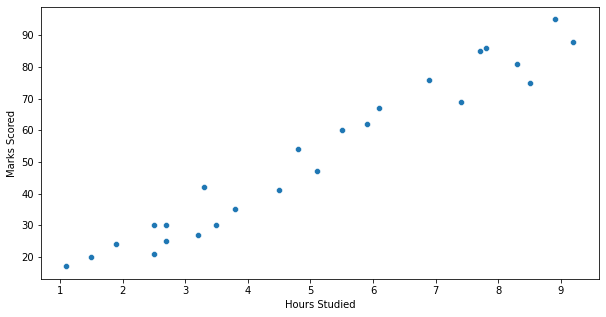

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Hours,y=df.Scores)
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.show()

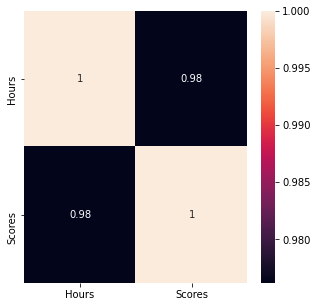

In [38]:
plt.figure(figsize=(5,5))
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [39]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores']

**Training of the model**

In [40]:
# Spliting the X,y into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

Import LinearRegression from sklearn

In [41]:
from sklearn.linear_model import LinearRegression

# Creating object and fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)

**Plotting the regression lines**

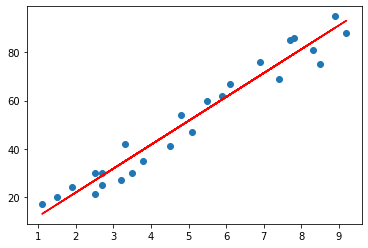

In [42]:
fitline = model.coef_*X+model.intercept_

# Plotting for the data
plt.scatter(X, y)
plt.plot(X, fitline, color = 'r');
plt.show()

**Making predictions**

In [43]:
y_pred = model.predict(X_test)

**Creating Actual and Predicted dataset**

In [44]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


**Evaluating the model**

In [45]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 4.183859899002982
RMSE: 4.647447612100373
R-Square: 0.9454906892105354


**Prediction of score if a student studies for 9.25 hrs/day**

In [46]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69
